# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
# ENTER YOUR CODE HERE.
df = pd.read_csv("sharktank.csv")
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
df.loc[:,'Corcoran' : 'Guest'] = df.loc[:, 'Corcoran' : 'Guest'].fillna(0)
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
df.Amount = df.Amount.apply(str)
df.Equity = df.Equity.apply(str)

df.Amount = df.Amount.str.strip("$")
df.Equity = df.Equity.str.strip("%")


df['Amount'] = df['Amount'].str.replace(',','')

df['Amount'] = df['Amount'].astype(float)
df['Equity'] = df['Equity'].astype(float)
df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# YOUR CODE HERE
#1. Create a new data frame which includes all the companies with investment 
new_df = df[df["Amount"].notnull()].copy() #New df which includes all the companies with
                                                #investments
new_df.reset_index(drop = True, inplace = True) #reseting the index, with drop being true to avoid the old index being added, and inplace to not create a new obj
#2. Find and drop the company with equity = 0 why?
new_df[new_df['Equity'] == 0] #Find the company with equity 0. 

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
150,5.0,13.0,The Wall DoctoRX,Yes,Lifestyle / Home,Male,150000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,exclusive rights to sell internationally


In [6]:
value = new_df.drop(150) #We drop the above company that has no equity because we can't
                            #divide by 0
#3. Calculate the one with the greatest value
valuation = value['Amount'] / (value['Equity'] / 100)
value.loc[[valuation.idxmax()]] #max valuation using idxmax which resturns index of max element

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
206,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,with an option for another $2.5 Million for an...


In [7]:
df.loc[[df["Amount"].idxmax()]] #This is to find the company with biggest investment. 

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
483,6.0,27.0,AirCar,Yes,Green/CleanTech,Male,5000000.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Contingent on getting deal to bring to contine...


**YOUR EXPLANATION HERE**: 
    To calculate the valuation of a company, first divide the equity by 100 to make it into a decimal number percentage. Divide the amount by this percentage to get the valuation.
    The company Zipc is the company with the highest valuation. AirCar is the company with the largest amount invested by sharks.
    This means that the highest valued company is not the company that recieved the most investment.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

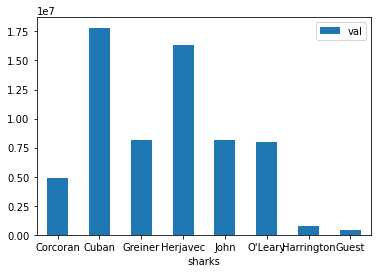

In [8]:
## ENTER CODE HERE.
#1. Create a new column with number of sharks who invested in each company
new_df["Num of Sharks"] = new_df.loc[:,'Corcoran':'Guest'].sum(axis = 1)
#2. Remove companies with 0 investors and update the table 
new_df = new_df[new_df["Num of Sharks"] != 0].reset_index(drop = True)
#3. Find the amount each shark invested for each company, given the total amount and the number of investors.(DIVDE)
new_df["Invested Each"] = new_df["Amount"]/new_df["Num of Sharks"]
new_df.head()
#Use a bar plot to find which shark invested more.
corcoran = new_df['Corcoran'] * new_df['Invested Each']
cuban = new_df['Cuban'] * new_df['Invested Each']
greiner = new_df['Greiner'] * new_df['Invested Each']
herjavec = new_df['Herjavec'] * new_df['Invested Each']
john = new_df['John'] * new_df['Invested Each']
oleary = new_df['O\'Leary'] * new_df['Invested Each']
harrington = new_df['Harrington'] * new_df['Invested Each']
guest = new_df['Guest'] * new_df['Invested Each']

df_sharks = pd.DataFrame({'sharks':['Corcoran','Cuban','Greiner','Herjavec','John','O\'Leary','Harrington','Guest'], 'val':[corcoran.sum(),cuban.sum(),greiner.sum(),herjavec.sum(),john.sum(),oleary.sum(),harrington.sum(),guest.sum()]})
ax = df_sharks.plot.bar(x='sharks', y='val', rot=0)

**YOUR EXPLANATION HERE**
        Since the decision of investment is denoted by a 1 or 0 for each shark, I multiplied the decision by the amount invested by each shark to a company. Then summed up those investments. If the decision was 0 then the investment would be multiplied by 0 so its not added to the total investment. This plot bar shows that Cuban invested the most, followed by Herjavec. 

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

<AxesSubplot:xlabel='Industry'>

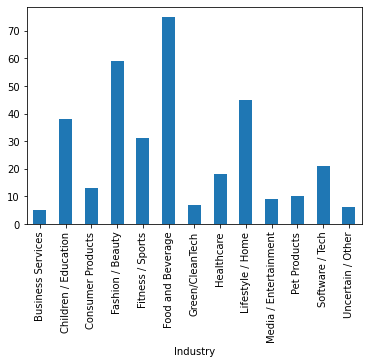

In [9]:
# ENTER CODE HERE.
#1. Compute the amount sharks invested on each company
df["Num of Sharks"] = df.loc[:, 'Corcoran': 'Guest'].sum(axis=1)
df.groupby("Industry")["Num of Sharks"].sum().plot.bar()

**YOUR EXPLANATION HERE**
The sharks prefer investing into a more gerneral than niche industry. Food and Bevereage is something everyone consumes so it makes sense that they want to invest into an industry that appeals to most people. We also chose to use a bar plot to better visualize our categorical data. 

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn
4. Demo your lab.